In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#Todo , Add Libraries above, which are required in notebook.

In [285]:
#Real Notebook

### We have to predict Kobe Bryant the legend when shoots, will he score a goal or not?
### That is  --> what all factors were involved when Kobe Bryant scored a goal in his career.
### Can we use ML to predict if he will score when he shoots, given the factors involved?
### Its a yes/no variable.
### So task is binary classification.

In [436]:
train_set = pd.read_csv('train_set.csv')

In [437]:
X_test = pd.read_csv('X_test.csv')

In [438]:
train_set.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_range,team_id,team_name,opponent,shot_id,shot_made_flag
0,41,20000936,33.9303,132,114,-118.1378,6,1,0,2000-01,57,17,2PT Field Goal,Right Side Center(RC),16-24 ft.,1610612747,Los Angeles Lakers,DET,1335,1.0
1,207,21000610,33.9623,-2,82,-118.2718,3,2,0,2010-11,41,8,2PT Field Goal,Center(C),8-16 ft.,1610612747,Los Angeles Lakers,OKC,17257,0.0
2,230,20600598,33.8913,133,153,-118.1368,11,3,0,2006-07,47,20,2PT Field Goal,Right Side Center(RC),16-24 ft.,1610612747,Los Angeles Lakers,NOP,10437,1.0
3,414,29800452,34.0443,0,0,-118.2698,0,4,0,1998-99,18,0,2PT Field Goal,Center(C),Less Than 8 ft.,1610612747,Los Angeles Lakers,PHX,24767,0.0
4,489,41000231,33.8093,102,235,-118.1678,0,4,1,2010-11,2,25,3PT Field Goal,Right Side Center(RC),24+ ft.,1610612747,Los Angeles Lakers,DAL,29675,0.0


In [439]:
train_set.shape

(17216, 20)

In [440]:
X_test.shape

(8481, 19)

In [441]:
train_set.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,team_id,shot_id,shot_made_flag
count,17216.000000,1.721600e+04,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,1.721600e+04,17216.000000,17216.000000
mean,248.911884,2.475939e+07,33.953061,6.869308,91.238557,-118.262931,4.873896,2.516612,0.148467,28.329809,13.412233,1.610613e+09,15338.092821,0.446213
std,149.796930,7.767366e+06,0.088591,109.734531,88.590678,0.109735,3.456423,1.151020,0.355572,17.529719,9.453346,0.000000e+00,8881.522898,0.497113
min,2.000000,2.000001e+07,33.253300,-250.000000,-43.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,0.000000
25%,111.000000,2.050004e+07,33.884300,-66.000000,3.000000,-118.335800,2.000000,1.000000,0.000000,13.000000,5.000000,1.610613e+09,7610.750000,0.000000
50%,254.000000,2.090038e+07,33.972300,0.000000,72.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,1.610613e+09,15398.000000,0.000000
75%,367.000000,2.960018e+07,34.041300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.610613e+09,22946.500000,1.000000
max,653.000000,4.990009e+07,34.087300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.610613e+09,30697.000000,1.000000


In [442]:
train_set.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_range', 'team_id', 'team_name', 'opponent', 'shot_id',
       'shot_made_flag'],
      dtype='object')

### There are some categorical variables, so we need to one-hot-encode them. Google if forgot.

In [443]:
train_set = pd.get_dummies(train_set)

In [444]:
X_test = pd.get_dummies(X_test)

In [445]:
len(train_set.columns)

81

In [446]:
len(X_test.columns)

80

##### See how number of columns shooted up.

##### Now the target variable is whether kobe hit a basket or not ie. the column shot_made_flag

###### Now drop two columns game_event_id and game_id from . As it doesnt make much intuitive sense that these can be good predictors
###### Think, why? Feel free to include it , if you think it might help.
###### But if you keep it in both, train and X_test, or else drop it from both.
###### Also team_name and team_id variables are constant throughout data. How can constant data help in predicting anything?

In [447]:
train_set.drop(['game_event_id','game_id'], axis = 1 , inplace = True)
X_test.drop(['game_event_id','game_id'], axis = 1 , inplace = True)
train_set.drop(['team_name_Los Angeles Lakers','team_id'], axis = 1 , inplace = True)
X_test.drop(['team_name_Los Angeles Lakers','team_id'], axis = 1 , inplace = True)

In [448]:
len(train_set.columns.values)

77

In [449]:
len(X_test.columns.values)

76

### Now for some cells you are free to explore all visualization and understand data.
#### Let me give 2 examples

In [450]:
train_set.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_id',
       'shot_made_flag', 'season_1996-97', 'season_1997-98', 'season_1998-99',
       'season_1999-00', 'season_2000-01', 'season_2001-02', 'season_2002-03',
       'season_2003-04', 'season_2004-05', 'season_2005-06', 'season_2006-07',
       'season_2007-08', 'season_2008-09', 'season_2009-10', 'season_2010-11',
       'season_2011-12', 'season_2012-13', 'season_2013-14', 'season_2014-15',
       'season_2015-16', 'shot_type_2PT Field Goal',
       'shot_type_3PT Field Goal', 'shot_zone_area_Back Court(BC)',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       'shot_zone_area_Right Side(R)', 'shot_zone_range_16-24 ft.',
       'shot_zone_range_24+ ft.', 'shot_zone_range_8-16 ft.',
       'shot_zone_range_Back Court Shot', 'shot_zone_range_Less 

In [451]:
X_test.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance', 'shot_id',
       'season_1996-97', 'season_1997-98', 'season_1998-99', 'season_1999-00',
       'season_2000-01', 'season_2001-02', 'season_2002-03', 'season_2003-04',
       'season_2004-05', 'season_2005-06', 'season_2006-07', 'season_2007-08',
       'season_2008-09', 'season_2009-10', 'season_2010-11', 'season_2011-12',
       'season_2012-13', 'season_2013-14', 'season_2014-15', 'season_2015-16',
       'shot_type_2PT Field Goal', 'shot_type_3PT Field Goal',
       'shot_zone_area_Back Court(BC)', 'shot_zone_area_Center(C)',
       'shot_zone_area_Left Side Center(LC)', 'shot_zone_area_Left Side(L)',
       'shot_zone_area_Right Side Center(RC)', 'shot_zone_area_Right Side(R)',
       'shot_zone_range_16-24 ft.', 'shot_zone_range_24+ ft.',
       'shot_zone_range_8-16 ft.', 'shot_zone_range_Back Court Shot',
       'shot_zone_range_Less Than 8 ft.', 'oppo

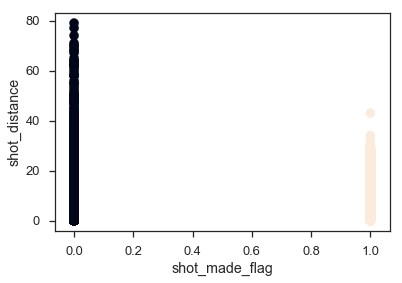

In [452]:
plt.figure()
plt.scatter(train_set['shot_made_flag'],train_set['shot_distance'],c= train_set['shot_made_flag'])
plt.xlabel('shot_made_flag')
plt.ylabel('shot_distance')
plt.show()

##### Now visulation is tough right? So we add random noise called jitter around 1 and 0. So it look like this

In [453]:
def jitter(x):
    return x + np.random.randn(len(x))/10

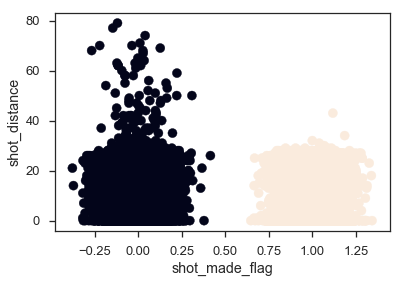

In [454]:
plt.figure()
plt.scatter(jitter(train_set['shot_made_flag']),train_set['shot_distance'],c= train_set['shot_made_flag'])
plt.xlabel('shot_made_flag')
plt.ylabel('shot_distance')
plt.show()

##### Now you can clearly see. The distrubtions and where the distributions are dense.

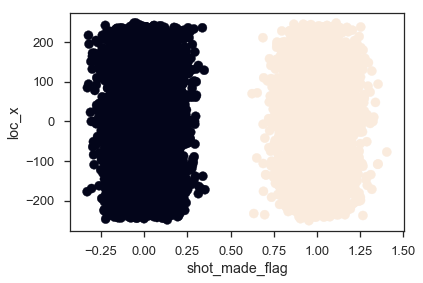

In [455]:
plt.figure()
plt.scatter(jitter(train_set['shot_made_flag']),train_set['loc_x'],c= train_set['shot_made_flag'])
plt.xlabel('shot_made_flag')
plt.ylabel('loc_x')
plt.show()

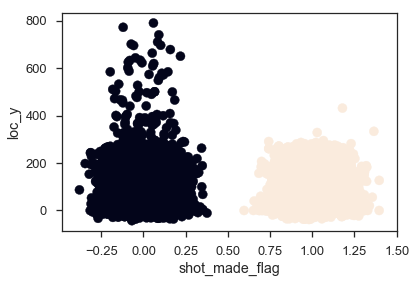

In [456]:
plt.figure()
plt.scatter(jitter(train_set['shot_made_flag']),train_set['loc_y'],c= train_set['shot_made_flag'])
plt.xlabel('shot_made_flag')
plt.ylabel('loc_y')
plt.show()

##### hmm.. looks like location x doesnt matter, but location y does. Makes sense.

#### Can there be a relation between minutes remaning and shot_zone_range?

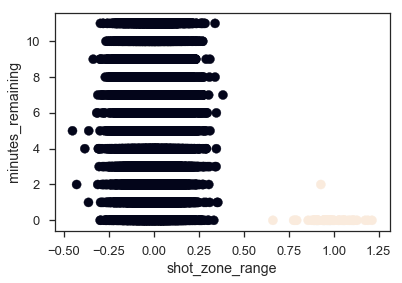

In [457]:
plt.figure()
plt.scatter(jitter(train_set['shot_zone_range_Back Court Shot']),train_set['minutes_remaining'],c= train_set['shot_zone_range_Back Court Shot'])
plt.xlabel('shot_zone_range')
plt.ylabel('minutes_remaining')
plt.show()

##### Again back court shots appear only when minutes remaining our less.

### You can explore more visualization on your own and come up with better undestanding of data.

##### Now all this analysis is done for creating better features(combination of variables)for model to learn.
##### This is called feature engineering. We will see how we can improve the model accuracy by generating a simple feature
#### Which is not already present in the data.

### Now your task is to fit a Logistic Regression model.
### ie.Linear Regression squashed between 0 and 1.

In [367]:
#Your simple task is to fit model on train set and predict on test set and submit the result.
#Hypothesis testing and feature engineering will be done in subsequent parts of the same assignment.
from sklearn.linear_model import LogisticRegression

In [403]:
#Read the docs of scikit-learn logistic regression.
#Train model on train set.
lm_model = LogisticRegression()

In [404]:
#For training, shot_made_flag and shot_id variables have to be dropped, as one is target and other is like an index
#Fit the lm_model here. Code below.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [406]:
#Predict on train set.
prediction_train = lm_model.predict(train_set.drop(['shot_made_flag','shot_id'], axis = 1))

In [458]:
#Find out your train set accuracy


In [413]:
#similarly predict for X_test
prediction_test = ##

In [414]:
#When you predict you will get a numpy array equal to number of rows in X_test

In [415]:
#Test set is expected to have 8481 rows and hence submit file also with have 8481 rows and two columns.

In [416]:
submit = pd.DataFrame({'shot_id':X_test['shot_id'],'shot_made_flag':prediction_test})

In [422]:
submit.shape

(8481, 2)

In [418]:
submit.to_csv('first_sub.csv')